# Preload Data and Packages

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2020-XTern-DS.csv to 2020-XTern-DS (1).csv


In [ ]:
import io
import pandas as pd
raw_df = pd.read_csv(io.BytesIO(uploaded['2020-XTern-DS.csv']), index_col=False)

In [ ]:
df = raw_df.copy()

In [ ]:
%matplotlib inline
get_ipython().magic(u'matplotlib inline')
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.filterwarnings('ignore')

!pip install pandasql
import pandasql as psql

# Overview of Data

In [ ]:
df.head()

,Restaurant,Latitude,Longitude,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
0,ID_6321,39.263,-85.837,"Fast Food, Rolls, Burger, Salad, Wraps",$20.00,$50.00,3.5,12,4,30 minutes
1,ID_2882,39.776,-85.741,"Ice Cream, Desserts",$10.00,$50.00,3.5,11,4,30 minutes
2,ID_1595,39.253,-85.124,"Italian, Street Food, Fast Food",$15.00,$50.00,3.6,99,30,65 minutes
3,ID_5929,39.030,-85.332,"Mughlai, North Indian, Chinese",$25.00,$99.00,3.7,176,95,30 minutes
4,ID_6123,39.882,-85.517,"Cafe, Beverages",$20.00,$99.00,3.2,521,235,65 minutes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant     2019 non-null   object 
 1   Latitude       2019 non-null   float64
 2   Longitude      2019 non-null   float64
 3   Cuisines       2019 non-null   object 
 4   Average_Cost   2019 non-null   object 
 5   Minimum_Order  2019 non-null   object 
 6   Rating         2019 non-null   object 
 7   Votes          2019 non-null   object 
 8   Reviews        2019 non-null   object 
 9   Cook_Time      2019 non-null   object 
dtypes: float64(2), object(8)
memory usage: 157.9+ KB


# Data Cleaning

## Convert Average_Cost, Minimum_Order to float

+ Observation 1: Values in Average_Cost and Minimum_Order are in string format as starting with the dollar sign 
  - Treatment: Remove the dollar sign

+ Observation 2: There is one row where Average_Cost is ,00
  - Treatment: Replace it with .00

In [ ]:
def currency_clean(var):
  # Remove dollar sign
  var = var[1:]

  # Replace ',' with '.'
  var = var.replace(",", ".")

  var = float(var)

  return var

In [ ]:
for var in ['Average_Cost', 'Minimum_Order']:
  df[var] = df[var].apply(currency_clean)

## Convert Rating to float 

+ Observation 1: There are values of '-', 'NEW', and 'Opening Soon' in Rating
  - Treatment: Replace them with with nan



In [ ]:
def rating_clean(var):
  if var == '-' or var == 'NEW' or var == 'Opening Soon':
    var = np.nan
  return float(var)

In [ ]:
df['Rating'] = df['Rating'].apply(rating_clean)

## Convert Votes and Reviews to int

+ Observation: There are values of '-' in Votes and Reviews
  - Treatment: Replace them with with nan


In [ ]:
def int_clean(var):
  if var == '-':
    return np.nan
  else:
    return int(var)

In [ ]:
for var in ['Votes', 'Reviews']:
  df[var] = df[var].apply(int_clean)

## Convert Cook_Time to int

In [ ]:
df.Cook_Time.value_counts()

30 minutes     1346
45 minutes      484
65 minutes      177
120 minutes       6
20 minutes        3
10 minutes        2
80 minutes        1
Name: Cook_Time, dtype: int64

In [ ]:
df.Cook_Time = df.Cook_Time.str.rstrip(' minutes').astype(int)

## Cleaned Dataset

In [ ]:
df.info()
df.describe(percentiles = [.1, .25, .5, .75, .95])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019 entries, 0 to 2018
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant     2019 non-null   object 
 1   Latitude       2019 non-null   float64
 2   Longitude      2019 non-null   float64
 3   Cuisines       2019 non-null   object 
 4   Average_Cost   2019 non-null   float64
 5   Minimum_Order  2019 non-null   float64
 6   Rating         1666 non-null   float64
 7   Votes          1639 non-null   float64
 8   Reviews        1604 non-null   float64
 9   Cook_Time      2019 non-null   int64  
dtypes: float64(7), int64(1), object(2)
memory usage: 157.9+ KB


,Latitude,Longitude,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Cook_Time
count,2019.000,2019.000,2019.000,2019.000,1666.000,1639.000,1604.000,2019.000
mean,39.499,-85.503,20.015,53.342,3.609,254.799,127.373,36.922
std,0.286,0.290,12.686,20.315,0.422,561.674,330.305,11.804
min,39.000,-85.999,0.000,0.000,2.400,4.000,1.000,10.000
10%,39.108,-85.900,10.000,50.000,3.100,9.000,3.000,30.000
25%,39.263,-85.749,10.000,50.000,3.300,18.000,7.000,30.000
50%,39.495,-85.509,20.000,50.000,3.600,65.000,27.000,30.000
75%,39.741,-85.246,20.000,50.000,3.900,246.000,102.250,45.000
95%,39.953,-85.049,40.500,99.000,4.300,1102.200,587.800,65.000
max,40.000,-85.002,150.000,450.000,4.800,9054.000,6504.000,120.000


# Conclusion 1: Trending Restaurants with the Highest Votes and Reviews 

Restaurants with ID_1064, ID_1666, ID_2885, ID_2601, and ID_6511 are restaurants with both the highest Votes and Reviews



In [ ]:
psql.sqldf("select Restaurant, Votes from df order by Votes desc limit 5")

,Restaurant,Votes
0,ID_1064,9054.000
1,ID_1666,4903.000
2,ID_2885,4691.000
3,ID_2601,4606.000
4,ID_6511,4438.000


In [ ]:
psql.sqldf("select Restaurant, Reviews from df order by Votes desc limit 5")

,Restaurant,Reviews
0,ID_1064,6504.000
1,ID_1666,3989.000
2,ID_2885,2547.000
3,ID_2601,2311.000
4,ID_6511,2576.000


In [ ]:
con1_1 = df.nlargest(5,'Votes')

Text(0.5, 0, 'Restaurant ID')

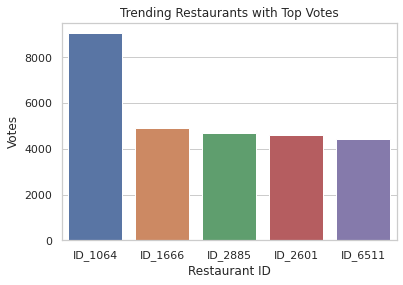

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Restaurant", y="Votes", data=con1_1)
ax.set_title('Trending Restaurants with Top Votes')
ax.set_ylabel('Votes')
ax.set_xlabel('Restaurant ID')


In [ ]:
con1_2 = df.nlargest(5,'Reviews')

Text(0.5, 0, 'Restaurant ID')

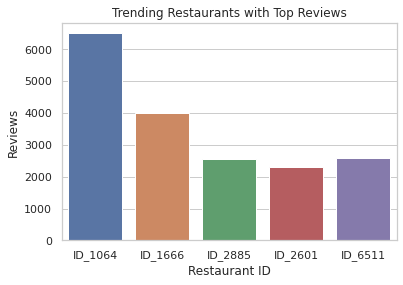

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Restaurant", y="Reviews", data=con1_1)
ax.set_title('Trending Restaurants with Top Reviews')
ax.set_ylabel('Reviews')
ax.set_xlabel('Restaurant ID')


# Conclusion 2: Rating Affects Votes and Reviews

Restaurants with higher ratings have more votes and reviews.




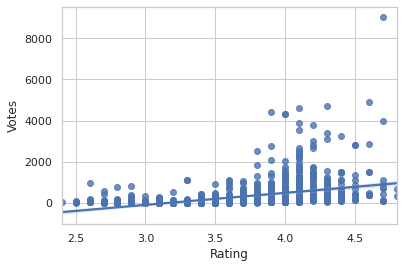

In [ ]:
ax = sns.regplot(x="Rating", y="Votes", data=df)

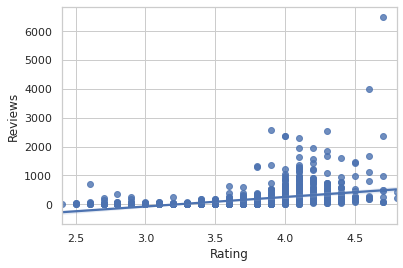

In [ ]:
ax = sns.regplot(x="Rating", y="Reviews", data=df)

# Conclusion 3: Pricy Restaurants 

Restaurants with ID_8403, ID_6278, ID_3192, ID_5879, and ID_1804 are the most expensive restaurants with the highest average costs.



In [ ]:
psql.sqldf("select distinct Restaurant, Average_Cost from df order by Average_Cost desc limit 5")

,Restaurant,Average_Cost
0,ID_8403,150.000
1,ID_6278,100.000
2,ID_3192,95.000
3,ID_5879,90.000
4,ID_1804,85.000


In [ ]:
# Select 6 since there is one duplicate
con2 = df.nlargest(6,'Average_Cost')

Text(0.5, 0, 'Restaurant ID')

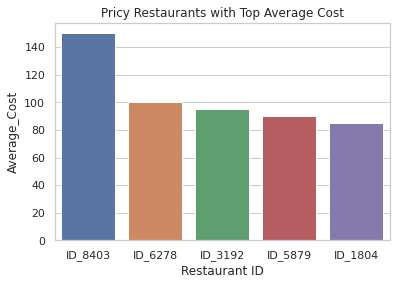

In [ ]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Restaurant", y="Average_Cost", data=con2)
ax.set_title('Pricy Restaurants with Top Average Cost')
ax.set_ylabel('Average_Cost')
ax.set_xlabel('Restaurant ID')


# Conclusion 4: Minimum Order Value Affects Average Cost

- Average_Cost is positively correlated with Minium_Order
- Most restaurants have minimum order below $100



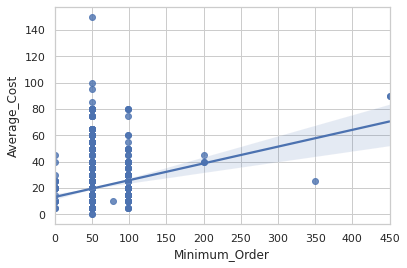

In [ ]:
ax = sns.regplot(x="Minimum_Order", y="Average_Cost", data=df)